# Лабораторная работа 3. Анимация движения секущей прямой к заданной линии на плоскости

Четверикова Вера Борисовна, 23.03.2025

## Задание 3.1. Анимированное построение линии на плоскости

In [1]:
import numpy as np
import ipympl
import ipywidgets
import sympy as sp

In [2]:
import matplotlib.pyplot as plt

In [3]:
from matplotlib.animation import FuncAnimation

In [4]:
%matplotlib widget

### Реализация Задания 3.1b

<span style="color:red;">Создайте аналогичную анимацию</span> построения графика параметрической функции $x = x(t), y = y(t)$ по значениям $t$, последовательно изменяющимся от $t_{\text{min}}$ до $t_{\text{max}}$ с шагом $step$. Выполните задание для функции из Задания 1.4 в Лб1, согласно Вашему варианту. Значениями $t_{\text{min}}$ и $t_{\text{max}}$ выберите самостоятельно с учетом непрерывности параметрической функции на выбранном диапазоне, $step = (t_{\text{max}} - t_{\text{min}})/100$.

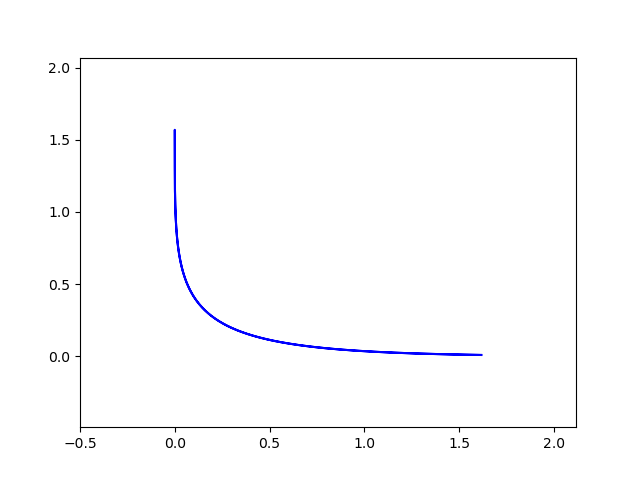

In [5]:
t = np.linspace(-0.99, 0.99, 1000)  # ограничиваем диапазон t, чтобы избежать деления на ноль

def f(t):
    x_param = np.log(1 / np.sqrt(1 - t**4))
    y_param = np.arcsin((1 - t**2) / (1 + t**2))
    return x_param, y_param

x_values, y_values = f(t)

matrix = np.column_stack((x_values, y_values))

x_min, x_max = np.min(x_values), np.max(x_values)
y_min, y_max = np.min(y_values), np.max(y_values)

fig1 = plt.figure()
ax1 = plt.axes()

plt.axis([
    x_min - 0.5, 
    x_max + 0.5, 
    y_min - 0.5, 
    y_max + 0.5
])

line1, = ax1.plot([], [], 'b')
line1.set_data(x_values, y_values)

In [6]:
def at_frame1(point):
    x_coord = list(line1.get_xdata())
    y_coord = list(line1.get_ydata())
    
    x_coord.append(point[0])
    y_coord.append(point[1])
    
    line1.set_data(x_coord, y_coord)
    return line1

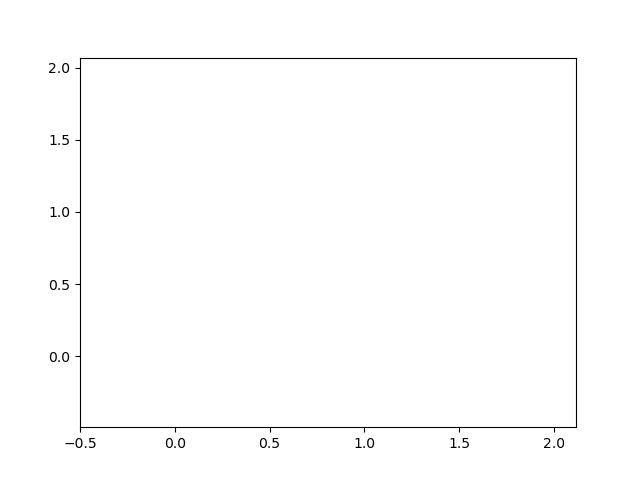

In [7]:
fig1 = plt.figure()
ax1 = plt.axes()

plt.axis([
    x_min - 0.5, 
    x_max + 0.5, 
    y_min - 0.5, 
    y_max + 0.5
])

line1, = ax1.plot([], [], 'b')

ani1 = FuncAnimation(fig1, at_frame1, frames=matrix, repeat=False, interval=20, blit=True)

## Задание 3.2. Движение точки по линии на плоскости

<span style="color:red;">Создайте анимацию</span> движения точки по заданной функции $x = x(t), y = y(t)$ по значениям $t$, последовательно изменяющимся от $t_{\text{min}}$ до $t_{\text{max}}$ с шагом $step$. Функция $x = x(t)$, $y = y(t)$ и значения переменных $t_{\text{min}}$, $t_{\text{max}}$ задаются такими же, как при выполнении Задания 3.1б.

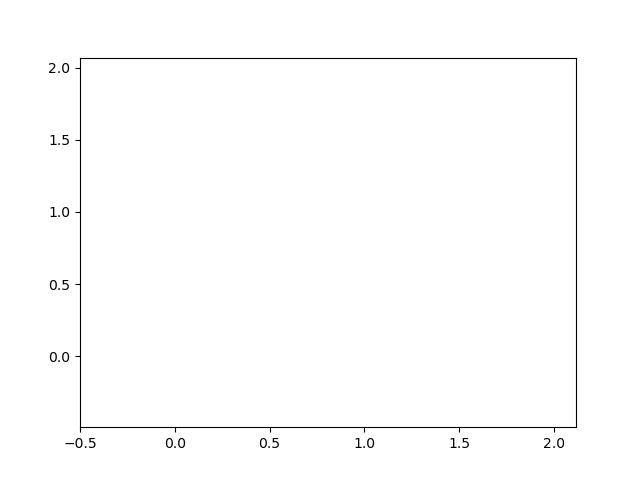

In [8]:
fig2 = plt.figure()
ax2 = plt.axes()
plt.axis([x_min-0.5, x_max+0.5, y_min-0.5, y_max+0.5])

line12, = ax2.plot([], [], 'b', label='Parametric curve')
line22, = ax2.plot([], [], 'go', markersize=8, label='Moving point')

def at_frame2(point):
    line22.set_data([point[0]], [point[1]])
    return line22

def init():
    line12.set_data(x_values, y_values)
    line22.set_data([], [])
    plt.legend([r'$x(t) = \ln\left(\frac{1}{\sqrt{1-t^4}}\right),\ y(t) = \arcsin\left(\frac{1-t^2}{1+t^2}\right)$', 'Movable point'])
    
ani2 = FuncAnimation(fig2, at_frame2, frames=matrix, init_func=init,repeat=False, interval=20)

## Задание 3.3. Движение секущей прямой к заданной линии на плоскости (версия 1)

<span style="color:red;">Создайте анимацию</span> движения секущей прямой, проходящей через точки $А$ и $В$ до момента совпадении координат точек $А$ и $В$, когда секущая прямая становится касательной прямой к заданной линии в начальной точке $А$.

<span style="color:red;">Напишите</span> пользовательскую функцию `at_frame3(t)`, которая будет вызываться в каждом кадре анимации, полагая, что аргумент `point` является массивом координат подвижной точки $В$. <span style="color:red;">Напишите</span> строки документации для пользовательской функции `at_frame3(t)`.

*Обратите внимание*, что при совпадении координат неподвижной точки $А$ и подвижной точки $B$ уравнение для задания секущей прямой через две точки возвращает только точку $А$. В этом случае векторно-параметрическое уравнение прямой должно быть заменено на уравнение касательной прямой в точке $А$. Вычисление производной в точке $А$, необходимое для построения касательной прямой, осуществите с помощью возможностей модуля `sp`. Касательную прямую изобразите красным цветом.

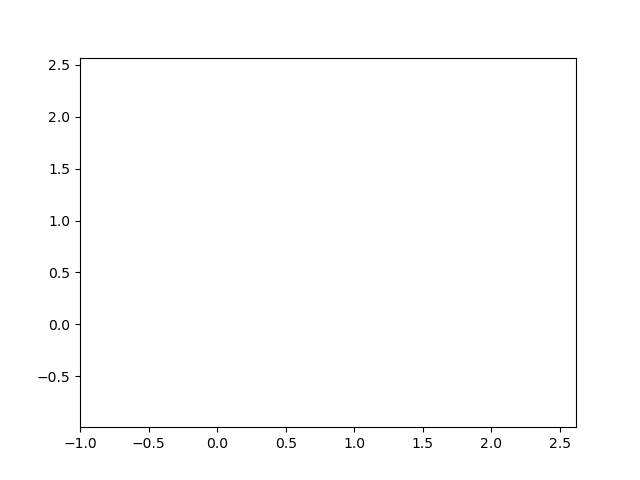

In [9]:
t1 = sp.Symbol('t')
x_expr = sp.log(1 / sp.sqrt(1 - t1**4))
y_expr = sp.asin((1 - t1**2)/(1 + t1**2))
dx_dt = sp.diff(x_expr, t1)
dy_dt = sp.diff(y_expr, t1)

fig3 = plt.figure()
ax3 = plt.axes()
plt.axis([x_min - 1, x_max + 1, y_min - 1, y_max + 1])

def init():
    global point_B, secant_line, A_point

    curve, = ax3.plot(x_values, y_values, 'b')
    
    A_point = np.array([x_values[0], y_values[0]])
    point_A, = ax3.plot(A_point[0], A_point[1], 'ro')
    
    point_B, = ax3.plot([], [], 'go')
    
    secant_line, = ax3.plot([], [], 'g--')

    plt.legend([r'Parametric curve: $x(t) = \ln\left(\frac{1}{\sqrt{1-t^4}}\right),\ y(t) = \arcsin\left(\frac{1-t^2}{1+t^2}\right)$', 'Unmovable point A','Мovable point B','Sec'])

def at_frame3(point):
    global point_B, secant_line, A_point
    
    B = np.array([point[0], point[1]])
    point_B.set_data([B[0]], [B[1]])
    
    if B[0] == A_point[0]: 
        t_val = t[0]

        dx = float(dx_dt.subs(t, t_val))
        dy = float(dy_dt.subs(t, t_val))
        
        if dx == 0: 
            tangent_x = [A_point[0]] * 2
            tangent_y = [A_point[1] - 1, A_point[1] + 1]
        else:
            slope = dy / dx
            tangent_x = [A_point[0] - 1, A_point[0] + 1]
            tangent_y = [A_point[1] - slope, A_point[1] + slope]
        
        secant_line.set_data(tangent_x, tangent_y)
        secant_line.set_color('r')
    else:
        direction = B - A_point
        points = [A_point - 2*direction, A_point + 2*direction]
        secant_line.set_data([p[0] for p in points], [p[1] for p in points])
        secant_line.set_color('g')

ani3 = FuncAnimation(fig3, at_frame3, frames=matrix[::-1], init_func=init, repeat=False, interval=20)

## Задание 3.4. Движение секущей прямой к заданной линии на плоскости (версия 2)

<span style="color:red;">Создайте анимацию</span> движения секущей прямой, проходящей через точки $А$ и $В$ до момента совпадении координат точек $А$ и $В$, когда секущая прямая становится касательной прямой к заданной линии в конечной точке $В$. Вычисление производной в точке $В$, необходимое для построения касательной прямой, осуществите с помощью возможностей модуля `sp`. Касательную прямую изобразите красным цветом.

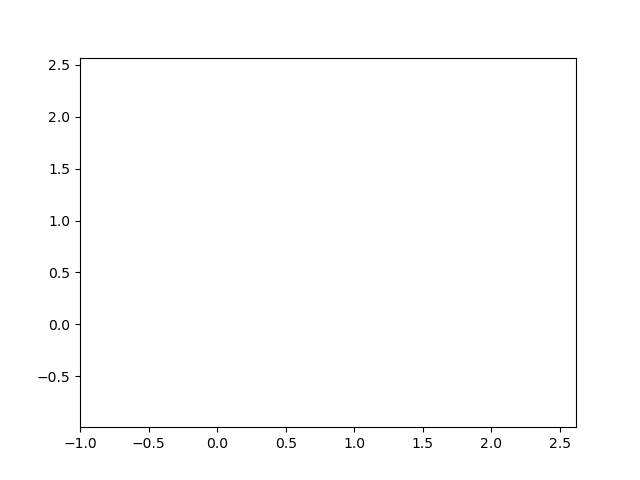

In [10]:
fig31 = plt.figure()
ax31 = plt.axes()
plt.axis([x_min-1, x_max+1, y_min-1, y_max+1])

x = np.log(1 / np.sqrt(1 - t**4))
y = np.arcsin((1 - t**2) / (1 + t**2))

def init3():
    global point_B3, secant_line3 

    curve, = ax31.plot(x, y,'b') 

    A3 = np.array([x[0], y[0]])
    point_A3, = ax31.plot(A3[0], A3[1],'ro')

    B3 = np.array([x[-1], y[-1]])
    point_B3, = ax31.plot(B3[0], B3[1],'go') 

    secant_p3 = [A3 + (B3 - A3) * t for t in [-2, 2]] 
    secant_p3 = np.array(secant_p3)
    secant_line3, = ax31.plot(secant_p3[:,0], secant_p3[:,1],'g--')

    plt.legend([r'Parametric curve: $x(t) = \ln\left(\frac{1}{\sqrt{1-t^4}}\right),\ y(t) = \arcsin\left(\frac{1-t^2}{1+t^2}\right)$','Unmovable point A','Мovable point B','Sec'])

def at_frame31(point):
    global point_B3, secant_line3

    A3 = np.array([x[0], y[0]])
    B3 = np.array([point[0],point[1]])
    point_B3.set_data([point[0]],[point[1]])

    if B3[0] == A3[0]:
        t = sp.Symbol('t')
        x_d = sp.arctan(sp.exp(t/2))
        y_d = sp.sqrt(sp.exp(t) + 1)
        x_difx = sp.diff(x_d, t)
        y_difx = sp.diff(y_d, t) 
        k=y_difx.subs(t, A_point[0])/x_difx.subs(t, A[0])
        y_kasstart = np.array([A_point[0],A_point[1]])
        y_kasend = np.array([A_point[0]+1,k+A_point[1]])
        y_kas=[y_kasstart+ (y_kasend-y_kasstart)*t for t in [-8, 8]]
        y_kas = np.array(y_kas)
        secant_line.set_data(y_kas[:,0], y_kas[:,1])
        secant_line.set_color('r')
    else:
        secant_p3 = [A3 + (B3 - A3)*l for l in [-2, 2]] 
        secant_p3 = np.array(secant_p3)
        secant_line3.set_data(secant_p3[:,0], secant_p3[:,1])

ani4 = FuncAnimation(fig31, at_frame31, frames=matrix[::-1], init_func=init3, repeat=False, interval=20)

In [11]:
plt.close('all')